This is a researsh on  BPM and exhaled hydration classification

In [1]:
!sudo apt install rar unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
The following NEW packages will be installed:
  rar
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 341 kB of archives.
After this operation, 1,202 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/multiverse amd64 rar amd64 2:5.5.0-1.1 [341 kB]
Fetched 341 kB in 1s (381 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package rar.
(Reading database

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

!unrar x "/content/drive/MyDrive/Exhaled hydration - Augmented Dataset.rar" "/content/dataset/Exhaled_hydration/"



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Exhaled hydration - Augmented Dataset.rar

Creating    /content/dataset                                          OK
Creating    /content/dataset/Exhaled_hydration                        OK
Creating    /content/dataset/Exhaled_hydration/Exhaled hydration - Augmented Dataset  OK
Creating    /content/dataset/Exhaled_hydration/Exhaled hydration - Augmented Dataset/12BPM Exhaled Hydration  OK
Extracting  /content/dataset/Exhaled_hydration/Exhaled hydration - Augmented Dataset/12BPM Exhaled Hydration/12BPM - P1 - Exhaled Hydration.csv       2%  OK 
Extracting  /content/dataset/Exhaled_hydration/Exhaled hydration - Augmented Dataset/12BPM Exhaled Hydration/12BPM - P10 - Exhaled Hydration.csv       4%  OK 
Extracting  /content/dataset/Exhaled_hydration/Exhaled hydration - Augmented Dataset/12BPM Exhaled Hydration/12BPM - P11 - Exhaled Hydration.csv       6%

In [4]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# Load the dataset (no header in the file)
file_path = "/content/dataset/Exhaled_hydration/Exhaled hydration - Augmented Dataset/12BPM Exhaled Hydration/12BPM - P1 - Exhaled Hydration.csv"
data = pd.read_csv(file_path, header=None, names=['Signal (dB)'])
data.columns

Index(['Signal (dB)'], dtype='object')

In [6]:
print(data.shape[0])
data.head(15)

200


,Signal (dB)
0,-0.0960
1,0.2870
2,0.3342
3,-0.0554
4,-0.2985
5,-0.1768
6,-0.2771
7,0.0690
8,0.0254
9,-0.3748


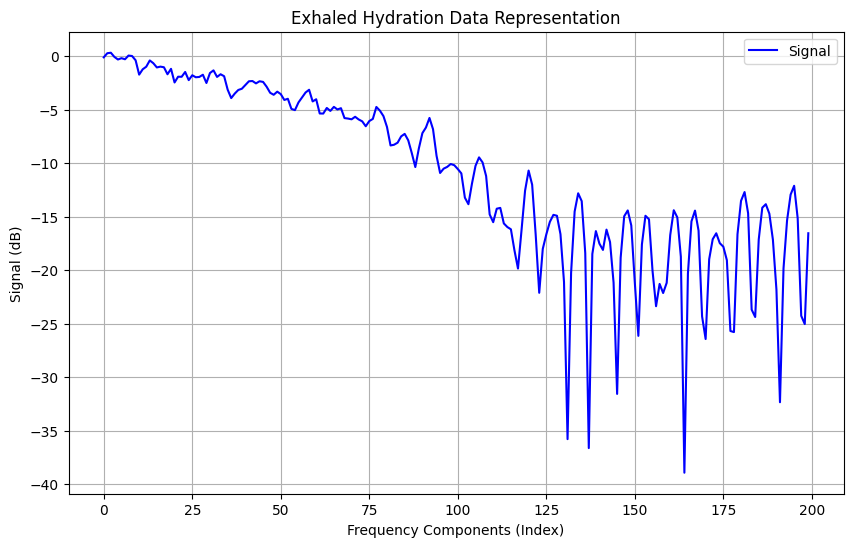

In [7]:

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Signal (dB)'], color='blue', label='Signal')

# Add labels, title, and legend
plt.xlabel('Frequency Components (Index)')
plt.ylabel('Signal (dB)')
plt.title('Exhaled Hydration Data Representation')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [8]:
import os
import pandas as pd

# Base directory containing the BPM folders
base_dir = "/content/dataset/Exhaled_hydration/Exhaled hydration - Augmented Dataset"

# Initialize an empty list to store data
combined_data = []

# Iterate over the BPM folders
for bpm_folder in ["12BPM Exhaled Hydration", "20BPM Exhaled Hydration", "28BPM Exhaled Hydration"]:
    bpm_value = int(bpm_folder.split("BPM")[0])  # Extract BPM value from folder name
    folder_path = os.path.join(base_dir, bpm_folder)

    # Iterate over the patient files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            # Extract patient ID (e.g., P1) from the filename
            patient_id = filename.split("-")[1].strip()

            # Load the CSV file
            file_path = os.path.join(folder_path, filename)
            signal_data = pd.read_csv(file_path, header=None, names=['SignalDb'])

            # Add data to the combined list
            combined_data.append({
                "PatientID": patient_id,
                "BPM": bpm_value,
                "SignalDb": signal_data['SignalDb'].tolist()  # Convert the column to an array
            })

# Convert the combined list to a DataFrame
combined_df = pd.DataFrame(combined_data)

# Display the first few rows of the combined DataFrame
combined_df.head()




,PatientID,BPM,SignalDb
0,P15,12,"[0.2863, 0.8526, 0.162, -0.0487, -1.0142, -0.9..."
1,P7,12,"[0.3995, 0.118, -0.0437, 0.4032, -0.4129, -1.0..."
2,P11,12,"[0.2994, 0.6671, -0.1397, 0.44, -0.4169, -0.91..."
3,P12,12,"[0.078, 0.4541, 0.2055, 0.2025, -0.9705, -0.59..."
4,P6,12,"[-0.2196, 0.5318, 0.373, -0.3025, -0.8368, -0...."


In [9]:
print(combined_df.shape[0])

45


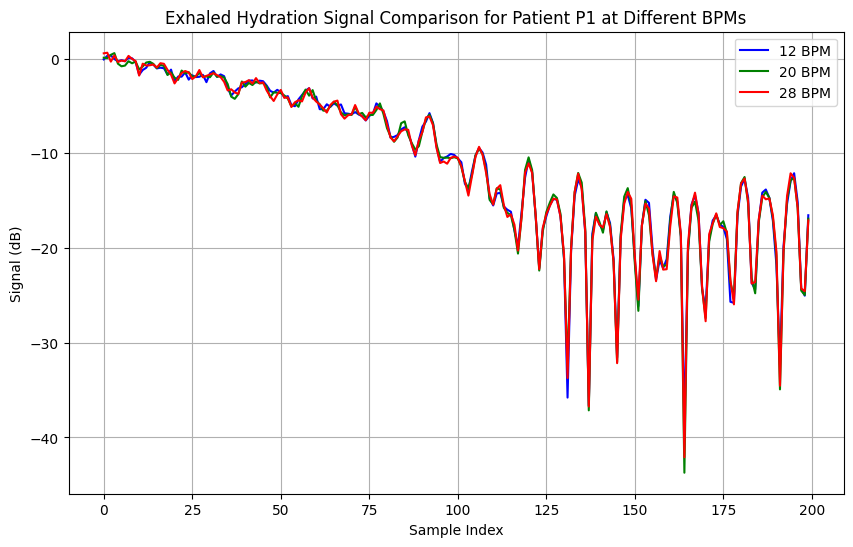

In [10]:
import matplotlib.pyplot as plt

# Filter data for patient P1
patient_data = combined_df[combined_df['PatientID'] == 'P1']

# Create a figure and axes
plt.figure(figsize=(10, 6))

# Plot signals for different BPMs with distinct colors
for bpm, color in zip([12, 20, 28], ['blue', 'green', 'red']):
    signal_data = patient_data[patient_data['BPM'] == bpm]['SignalDb'].values[0]
    plt.plot(signal_data, color=color, label=f'{bpm} BPM')

# Add labels, title, and legend
plt.xlabel('Sample Index')
plt.ylabel('Signal (dB)')
plt.title('Exhaled Hydration Signal Comparison for Patient P1 at Different BPMs')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os

# Base directory containing the BPM folders
base_dir = "/content/dataset/Exhaled_hydration/Exhaled hydration - Augmented Dataset"

# Initialize an empty list to store data
combined_data = []

# Iterate over the BPM folders
for bpm_folder in ["12BPM Exhaled Hydration", "20BPM Exhaled Hydration", "28BPM Exhaled Hydration"]:
    bpm_value = int(bpm_folder.split("BPM")[0])  # Extract BPM value from folder name
    folder_path = os.path.join(base_dir, bpm_folder)

    # Iterate over the patient files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            # Extract patient ID (e.g., P1) from the filename
            patient_id = filename.split("-")[1].strip()

            # Load the CSV file
            file_path = os.path.join(folder_path, filename)
            signal_data = pd.read_csv(file_path, header=None, names=['SignalDb'])

            # Add data to the combined list
            combined_data.append({
                "PatientID": patient_id,
                "BPM": bpm_value,
                "SignalDb": signal_data['SignalDb'].tolist()  # Convert the column to an array
            })

# Convert the combined list to a DataFrame
combined_df = pd.DataFrame(combined_data)

# Split the dataset into training and testing sets before further processing
train_df, test_df = train_test_split(combined_df, test_size=0.2, random_state=42)





# Save the model
#model.save("hydration_level_model.h5")


In [12]:
# Define thresholds for hydration levels
LOW_THRESHOLD = -30
HIGH_THRESHOLD = -10

def categorize_hydration(signal):
    """Categorize hydration level based on thresholds."""
    avg_signal = np.mean(signal)  # Use average signal value for classification
    if avg_signal < LOW_THRESHOLD:
        return "low"
    elif avg_signal > HIGH_THRESHOLD:
        return "high"
    else:
        return "normal"

In [13]:
# Apply categorization on training and testing datasets
train_df["HydrationLevel"] = train_df["SignalDb"].apply(categorize_hydration)
test_df["HydrationLevel"] = test_df["SignalDb"].apply(categorize_hydration)

# Prepare data for model training
X_train = np.array(train_df["SignalDb"].tolist())  # Features (signals)
y_train = train_df["HydrationLevel"]  # Labels for training

X_test = np.array(test_df["SignalDb"].tolist())  # Features (signals)
y_test = test_df["HydrationLevel"]  # Labels for testing

# Encode labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [14]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer matching signal length
    tf.keras.layers.Dense(32, activation="relu"),  # Hidden layer
    tf.keras.layers.Dense(16, activation="relu"),  # Hidden layer
    tf.keras.layers.Dense(3, activation="softmax"),  # Output layer (3 classes: low, normal, high)
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=50, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 4.9858e-05 - val_accuracy: 1.0000 - val_loss: 1.7881e-07
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 1.0000 - loss: 1.4475e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - 